In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
# Import file with all US bond funds
all_funds = pd.read_csv("resources/us_bond_funds_063019.csv")
all_funds.head()

,Group/Investment,Ticker,Inception Date,Morningstar Category,Index,Analysis Date,Analyst Rating,People Rating,Process Rating,Parent Rating,...,IR Shock 2018 Jan - Oct 2018,IR Shock 2018 Jan - Oct 2018 Rank,EM LC Sell-Off April - Oct 2019,EM LC Sell-Off April - Oct 2019 Rank,HY Equity Sell-Off Oct - Dec 2018,HY Equity Sell-Off Oct - Dec 2018 Rank,2008 Return,2008 Return Rank,2009 Return,2009 Return Rank
0,AdvisorShares Pacific Asst Enh Fl Rt ETF,FLRT,2/18/15,US Fund Bank Loan,No,NaN,NaN,NaN,NaN,NaN,...,2.84,88.0,1.95,75.0,-3.89,84.0,NaN,NaN,NaN,NaN
1,AIG Senior Floating Rate A,SASFX,10/4/06,US Fund Bank Loan,No,NaN,NaN,NaN,NaN,NaN,...,3.43,37.0,2.34,19.0,-3.79,78.0,-38.13,100.0,60.63,5.0
2,American Beacon Sound Point FlRtIn Y,SPFYX,12/11/15,US Fund Bank Loan,No,NaN,NaN,NaN,NaN,NaN,...,3.77,14.0,2.26,27.0,-2.39,7.0,NaN,NaN,NaN,NaN
3,Barings Global Floating Rate Y,BXFYX,9/16/13,US Fund Bank Loan,No,NaN,NaN,NaN,NaN,NaN,...,3.39,42.0,2.18,34.0,-3.38,45.0,NaN,NaN,NaN,NaN
4,BlackRock Floating Rate Income Instl,BFRIX,3/18/11,US Fund Bank Loan,No,NaN,NaN,NaN,NaN,NaN,...,3.13,67.0,2.03,62.0,-3.60,60.0,-28.66,47.0,39.83,60.0


In [3]:
# Rename some columns
all_funds = all_funds.rename(columns={
    "Group/Investment":"Name",
    "Morningstar Category":"Category",
    "Morningstar Fee Level Rank - Distribution":"Fee Level Rank",
    "Manager Tenure - Longest Rank":"Longest Manager Tenure Rank",
    "Manager Tenure - Average Rank":"Average Manager Tenure Rank"
})
all_funds.head()

,Name,Ticker,Inception Date,Category,Index,Analysis Date,Analyst Rating,People Rating,Process Rating,Parent Rating,...,IR Shock 2018 Jan - Oct 2018,IR Shock 2018 Jan - Oct 2018 Rank,EM LC Sell-Off April - Oct 2019,EM LC Sell-Off April - Oct 2019 Rank,HY Equity Sell-Off Oct - Dec 2018,HY Equity Sell-Off Oct - Dec 2018 Rank,2008 Return,2008 Return Rank,2009 Return,2009 Return Rank
0,AdvisorShares Pacific Asst Enh Fl Rt ETF,FLRT,2/18/15,US Fund Bank Loan,No,NaN,NaN,NaN,NaN,NaN,...,2.84,88.0,1.95,75.0,-3.89,84.0,NaN,NaN,NaN,NaN
1,AIG Senior Floating Rate A,SASFX,10/4/06,US Fund Bank Loan,No,NaN,NaN,NaN,NaN,NaN,...,3.43,37.0,2.34,19.0,-3.79,78.0,-38.13,100.0,60.63,5.0
2,American Beacon Sound Point FlRtIn Y,SPFYX,12/11/15,US Fund Bank Loan,No,NaN,NaN,NaN,NaN,NaN,...,3.77,14.0,2.26,27.0,-2.39,7.0,NaN,NaN,NaN,NaN
3,Barings Global Floating Rate Y,BXFYX,9/16/13,US Fund Bank Loan,No,NaN,NaN,NaN,NaN,NaN,...,3.39,42.0,2.18,34.0,-3.38,45.0,NaN,NaN,NaN,NaN
4,BlackRock Floating Rate Income Instl,BFRIX,3/18/11,US Fund Bank Loan,No,NaN,NaN,NaN,NaN,NaN,...,3.13,67.0,2.03,62.0,-3.60,60.0,-28.66,47.0,39.83,60.0


In [4]:
# Exclude funds with no Analyst Rating
rated_funds = all_funds.dropna(subset=["Analyst Rating"])

# Exclude index funds
rated_active = rated_funds.loc[rated_funds['Index'] == "No"]

# Reset index
rated_active = rated_active.reset_index(drop=True)
rated_active.head()

,Name,Ticker,Inception Date,Category,Index,Analysis Date,Analyst Rating,People Rating,Process Rating,Parent Rating,...,IR Shock 2018 Jan - Oct 2018,IR Shock 2018 Jan - Oct 2018 Rank,EM LC Sell-Off April - Oct 2019,EM LC Sell-Off April - Oct 2019 Rank,HY Equity Sell-Off Oct - Dec 2018,HY Equity Sell-Off Oct - Dec 2018 Rank,2008 Return,2008 Return Rank,2009 Return,2009 Return Rank
0,Columbia Floating Rate Inst,CFRZX,9/27/10,US Fund Bank Loan,No,2/22/19,Neutral,Neutral,Neutral,Neutral,...,3.76,17.0,2.06,57.0,-3.70,71.0,-30.44,76.0,42.25,45.0
1,Credit Suisse Floating Rate Hi Inc Instl,CSHIX,8/1/00,US Fund Bank Loan,No,11/29/18,Bronze,Positive,Positive,Neutral,...,3.25,52.0,2.31,22.0,-3.19,35.0,-24.66,35.0,52.77,10.0
2,Delaware Floating Rate Instl,DDFLX,2/26/10,US Fund Bank Loan,No,7/18/18,Neutral,Neutral,Neutral,Neutral,...,3.70,19.0,2.49,12.0,-2.74,15.0,NaN,NaN,NaN,NaN
3,Eaton Vance Floating-Rate & Hi Inc Inst,EIFHX,9/15/00,US Fund Bank Loan,No,6/7/19,Bronze,Positive,Positive,Neutral,...,3.63,22.0,2.43,15.0,-3.56,56.0,-30.80,82.0,48.33,15.0
4,Eaton Vance Floating-Rate Advantage I,EIFAX,3/17/08,US Fund Bank Loan,No,4/22/19,Bronze,Positive,Positive,Neutral,...,4.55,1.0,2.79,1.0,-4.12,90.0,-36.93,94.0,65.84,1.0


In [5]:
# Add a column for fund age
current_year = pd.to_datetime('today').year
rated_active['Inception Date'] = pd.to_datetime(rated_active['Inception Date'])
rated_active['Fund Age'] = current_year - rated_active['Inception Date'].dt.year
rated_active.head()

,Name,Ticker,Inception Date,Category,Index,Analysis Date,Analyst Rating,People Rating,Process Rating,Parent Rating,...,IR Shock 2018 Jan - Oct 2018 Rank,EM LC Sell-Off April - Oct 2019,EM LC Sell-Off April - Oct 2019 Rank,HY Equity Sell-Off Oct - Dec 2018,HY Equity Sell-Off Oct - Dec 2018 Rank,2008 Return,2008 Return Rank,2009 Return,2009 Return Rank,Fund Age
0,Columbia Floating Rate Inst,CFRZX,2010-09-27,US Fund Bank Loan,No,2/22/19,Neutral,Neutral,Neutral,Neutral,...,17.0,2.06,57.0,-3.70,71.0,-30.44,76.0,42.25,45.0,9
1,Credit Suisse Floating Rate Hi Inc Instl,CSHIX,2000-08-01,US Fund Bank Loan,No,11/29/18,Bronze,Positive,Positive,Neutral,...,52.0,2.31,22.0,-3.19,35.0,-24.66,35.0,52.77,10.0,19
2,Delaware Floating Rate Instl,DDFLX,2010-02-26,US Fund Bank Loan,No,7/18/18,Neutral,Neutral,Neutral,Neutral,...,19.0,2.49,12.0,-2.74,15.0,NaN,NaN,NaN,NaN,9
3,Eaton Vance Floating-Rate & Hi Inc Inst,EIFHX,2000-09-15,US Fund Bank Loan,No,6/7/19,Bronze,Positive,Positive,Neutral,...,22.0,2.43,15.0,-3.56,56.0,-30.80,82.0,48.33,15.0,19
4,Eaton Vance Floating-Rate Advantage I,EIFAX,2008-03-17,US Fund Bank Loan,No,4/22/19,Bronze,Positive,Positive,Neutral,...,1.0,2.79,1.0,-4.12,90.0,-36.93,94.0,65.84,1.0,11


In [6]:
# Convert analyst ratings of Gold, Silver, Bronze to recommend (1) and Neutral and Negative to not recommend (0) in a new column called recommend
rated_active['Recommend'] = rated_active['Analyst Rating']
rated_active['Recommend'] = rated_active['Recommend'].replace({'Bronze': 1, 'Silver': 1, 'Gold': 1, 'Neutral': 0, 'Negative':0})
rated_active.head()

,Name,Ticker,Inception Date,Category,Index,Analysis Date,Analyst Rating,People Rating,Process Rating,Parent Rating,...,EM LC Sell-Off April - Oct 2019,EM LC Sell-Off April - Oct 2019 Rank,HY Equity Sell-Off Oct - Dec 2018,HY Equity Sell-Off Oct - Dec 2018 Rank,2008 Return,2008 Return Rank,2009 Return,2009 Return Rank,Fund Age,Recommend
0,Columbia Floating Rate Inst,CFRZX,2010-09-27,US Fund Bank Loan,No,2/22/19,Neutral,Neutral,Neutral,Neutral,...,2.06,57.0,-3.70,71.0,-30.44,76.0,42.25,45.0,9,0
1,Credit Suisse Floating Rate Hi Inc Instl,CSHIX,2000-08-01,US Fund Bank Loan,No,11/29/18,Bronze,Positive,Positive,Neutral,...,2.31,22.0,-3.19,35.0,-24.66,35.0,52.77,10.0,19,1
2,Delaware Floating Rate Instl,DDFLX,2010-02-26,US Fund Bank Loan,No,7/18/18,Neutral,Neutral,Neutral,Neutral,...,2.49,12.0,-2.74,15.0,NaN,NaN,NaN,NaN,9,0
3,Eaton Vance Floating-Rate & Hi Inc Inst,EIFHX,2000-09-15,US Fund Bank Loan,No,6/7/19,Bronze,Positive,Positive,Neutral,...,2.43,15.0,-3.56,56.0,-30.80,82.0,48.33,15.0,19,1
4,Eaton Vance Floating-Rate Advantage I,EIFAX,2008-03-17,US Fund Bank Loan,No,4/22/19,Bronze,Positive,Positive,Neutral,...,2.79,1.0,-4.12,90.0,-36.93,94.0,65.84,1.0,11,1


In [7]:
list(rated_active)

['Name',
 'Ticker',
 'Inception Date',
 'Category',
 'Index',
 'Analysis Date',
 'Analyst Rating',
 'People Rating',
 'Process Rating',
 'Parent Rating',
 'Performance Rating',
 'Price Rating',
 'Star Rating',
 'Prospectus Adjusted Operating Expense Ratio',
 'Fee Level Rank',
 'Fund Size',
 'Fund Size Rank',
 'Est Fund-Level Net Flow 1 Yr',
 'Est Fund-Level Net Flow 1 Yr Rank',
 'Est Fund-Level Net Flow 3 Yr',
 'Est Fund-Level Net Flow 3 Yr Rank',
 'Est Fund-Level Net Flow 5 Yr',
 'Est Fund-Level Net Flow 5 Yr Rank',
 'Flows % 1 Yr',
 'Flows % 1 Yr Rank',
 'Manager Tenure - Longest',
 'Longest Manager Tenure Rank',
 'Manager Tenure - Average',
 'Average Manager Tenure Rank',
 'Manager Ownership Level',
 '12 Mo Yield',
 '12 Mo Yield Rank',
 'Eff Duration',
 'Eff Duration Rank',
 'Credit Qual AAA %',
 'Credit Qual AAA Rank',
 'Credit Qual AA %',
 'Credit Qual AA Rank',
 'Credit Qual A % ',
 'Credit Qual A Rank',
 'Credit Qual BBB %',
 'Credit Qual BBB Rank',
 'Credit Qual BB %',
 'Credit

In [11]:
# Filter dataframe to just include rank columns
rated_ranks = rated_active[['Name',
                            'Ticker',
                            'Category',
                            'Analyst Rating',
                            'Recommend',
                            'Fund Age',
                            'Fee Level Rank',
                            'Star Rating',
                            'Fund Size Rank',
                            'Est Fund-Level Net Flow 1 Yr Rank',
                            'Est Fund-Level Net Flow 3 Yr Rank',
                            'Est Fund-Level Net Flow 5 Yr Rank',
                            'Flows % 1 Yr Rank',
                            'Longest Manager Tenure Rank',
                            'Average Manager Tenure Rank',
                            '12 Mo Yield Rank',
                            'Eff Duration Rank',
                            'Credit Qual AAA Rank',
                            'Credit Qual AA Rank',
                            'Credit Qual A Rank',
                            'Credit Qual BBB Rank',
                            'Credit Qual BB Rank',
                            'Credit Qual B Rank',
                            'Credit Qual CCC Rank',
                            'Credit Qual NR Rank',
                            '% Asset in Top 10 Rank',
                            '# of Holdings Rank',
                            'Government Rank',
                            'Corporate Bond Rank',
                            'Agency MBS Rank',
                            'Nonagency RMBS Rank',
                            'CMBS Rank',
                            'ABS Rank',
                            'Cash & Equivalents Rank',
                            '3 Yr Return Rank',
                            '3 Yr Std Dev Rank',
                            '3 Yr Sharpe Ratio Rank',
                            '3 Yr Alpha Rank',
                            '3 Yr Beta Rank',
                            '3 Yr R2 Rank',
                            '3 Yr Max Drawdown Rank',
                            '5 Yr Return Rank',
                            '5 Yr Std Dev Rank',
                            '5 Yr Sharpe Ratio Rank',
                            '5 Yr Alpha Rank',
                            '5 Yr Beta Rank',
                            '5 Yr R2 Rank',
                            '5 Yr Max Drawdown Rank',
                            '10 Yr Return Rank',
                            '10 Yr Std Dev Rank',
                            '10 Yr Sharpe Ratio Rank',
                            '10 Yr Alpha Rank',
                            '10 Yr Beta Rank',
                            '10 Yr R2 Rank',
                            '10 Yr Max Drawdown Rank',
                            '15 Yr Return Rank',
                            '15 Yr Std Dev Rank',
                            '15 Yr Sharpe Ratio Rank',
                            '15 Yr Alpha Rank',
                            '15 Yr Beta Rank',
                            '15 Yr R2 Rank',
                            '15 Yr Max Drawdown Rank',
                            'IR Shock Oct 2010 - Jan 2011 Rank',
                            'Eurozone Crisis June - Sep 2011 Rank',
                            'Taper Tantrum May - Aug 2013 Rank',
                            'EM LC Sell-Off Sep - Dec 2014 Rank',
                            'HY Sell-Off June 2015 - Feb 2016 Rank',
                            'IR Shock Aug - Dec 2016 Rank',
                            'IR Shock 2018 Jan - Oct 2018 Rank',
                            'EM LC Sell-Off April - Oct 2019 Rank',
                            'HY Equity Sell-Off Oct - Dec 2018 Rank',
                            '2008 Return Rank',
                            '2009 Return Rank']]

pd.set_option('precision', 0)
rated_ranks["Category"].unique()

array(['US Fund Bank Loan', 'US Fund Corporate Bond',
       'US Fund Emerging Markets Bond',
       'US Fund Emerging-Markets Local-Currency Bond',
       'US Fund High Yield Bond', 'US Fund Inflation-Protected Bond',
       'US Fund Intermediate Core Bond',
       'US Fund Intermediate Core-Plus Bond',
       'US Fund Intermediate Government', 'US Fund Long-Term Bond',
       'US Fund Long Government', 'US Fund Multisector Bond',
       'US Fund Nontraditional Bond', 'US Fund Short-Term Bond',
       'US Fund Short Government', 'US Fund Ultrashort Bond',
       'US Fund World Bond', 'US Fund World Bond-USD Hedged'],
      dtype=object)

In [12]:
# Replace NaNs with 50
rated_ranks.fillna(50, inplace=True)
rated_ranks.head()

/anaconda3/envs/PythonData/lib/python3.6/site-packages/pandas/core/frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


,Name,Ticker,Category,Analyst Rating,Recommend,Fund Age,Fee Level Rank,Star Rating,Fund Size Rank,Est Fund-Level Net Flow 1 Yr Rank,...,Eurozone Crisis June - Sep 2011 Rank,Taper Tantrum May - Aug 2013 Rank,EM LC Sell-Off Sep - Dec 2014 Rank,HY Sell-Off June 2015 - Feb 2016 Rank,IR Shock Aug - Dec 2016 Rank,IR Shock 2018 Jan - Oct 2018 Rank,EM LC Sell-Off April - Oct 2019 Rank,HY Equity Sell-Off Oct - Dec 2018 Rank,2008 Return Rank,2009 Return Rank
0,Columbia Floating Rate Inst,CFRZX,US Fund Bank Loan,Neutral,0,9,66,4,41,44,...,96,7,67,48,41,17,57,71,76,45
1,Credit Suisse Floating Rate Hi Inc Instl,CSHIX,US Fund Bank Loan,Bronze,1,19,25,5,19,82,...,27,40,39,46,27,52,22,35,35,10
2,Delaware Floating Rate Instl,DDFLX,US Fund Bank Loan,Neutral,0,9,24,2,78,32,...,7,97,42,26,100,19,12,15,50,50
3,Eaton Vance Floating-Rate & Hi Inc Inst,EIFHX,US Fund Bank Loan,Bronze,1,19,55,5,33,64,...,47,70,44,63,18,22,15,56,82,15
4,Eaton Vance Floating-Rate Advantage I,EIFAX,US Fund Bank Loan,Bronze,1,11,95,5,5,84,...,67,30,48,78,9,1,1,90,94,1


In [ ]:
# rated_ranks.to_csv("resources/rated_bond_funds.csv", index=False, header=True)

In [13]:
pd.set_option('precision', 1)
total_ratings = len(rated_ranks["Analyst Rating"])
ratings_count = rated_ranks["Analyst Rating"].value_counts()
ratings_distribution = pd.DataFrame({"Count": ratings_count,
                                    "Percent": 100*ratings_count/total_ratings
                                    })
ratings_distribution

,Count,Percent
Neutral,143,48.8
Bronze,78,26.6
Silver,51,17.4
Gold,19,6.5
Negative,2,0.7


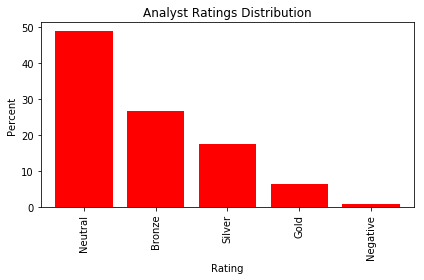

In [14]:
# Create plot
percent = ratings_distribution['Percent']
ratings = ["Neutral", "Bronze", "Silver", "Gold", "Negative"]
x_axis = np.arange(len(ratings))

# plt.figure(figsize=(20, 5))
plt.bar(x_axis, percent, color="r", align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ratings, rotation=90)
plt.xlim(-0.6, len(x_axis)-0.4)

plt.ylabel('Percent')
plt.title('Analyst Ratings Distribution')
plt.xlabel('Rating')

plt.tight_layout()
plt.savefig("images/distribution.png")
plt.show()
